In [1]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [2]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [3]:
# code here
df = pd.read_csv("../data/bank-full.csv", sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Describe the dataset informations

In [4]:
# code here


df_cat_var_list=df.select_dtypes(include='object').columns.to_list()
df_cat_var_list

df_num_var_list=df.select_dtypes(include='number').columns.to_list()
df_num_var_list

df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Use histogramms to display the features' distribution

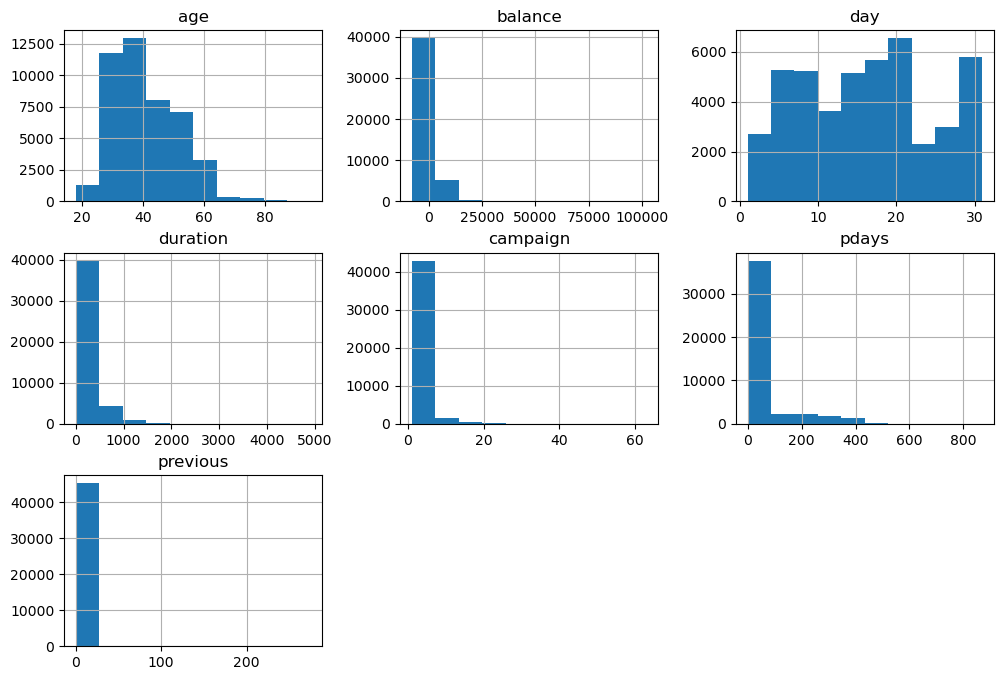

In [5]:
# code here
import seaborn as sns
import numpy as np 

df.hist(figsize=(12,8))


plt.show()

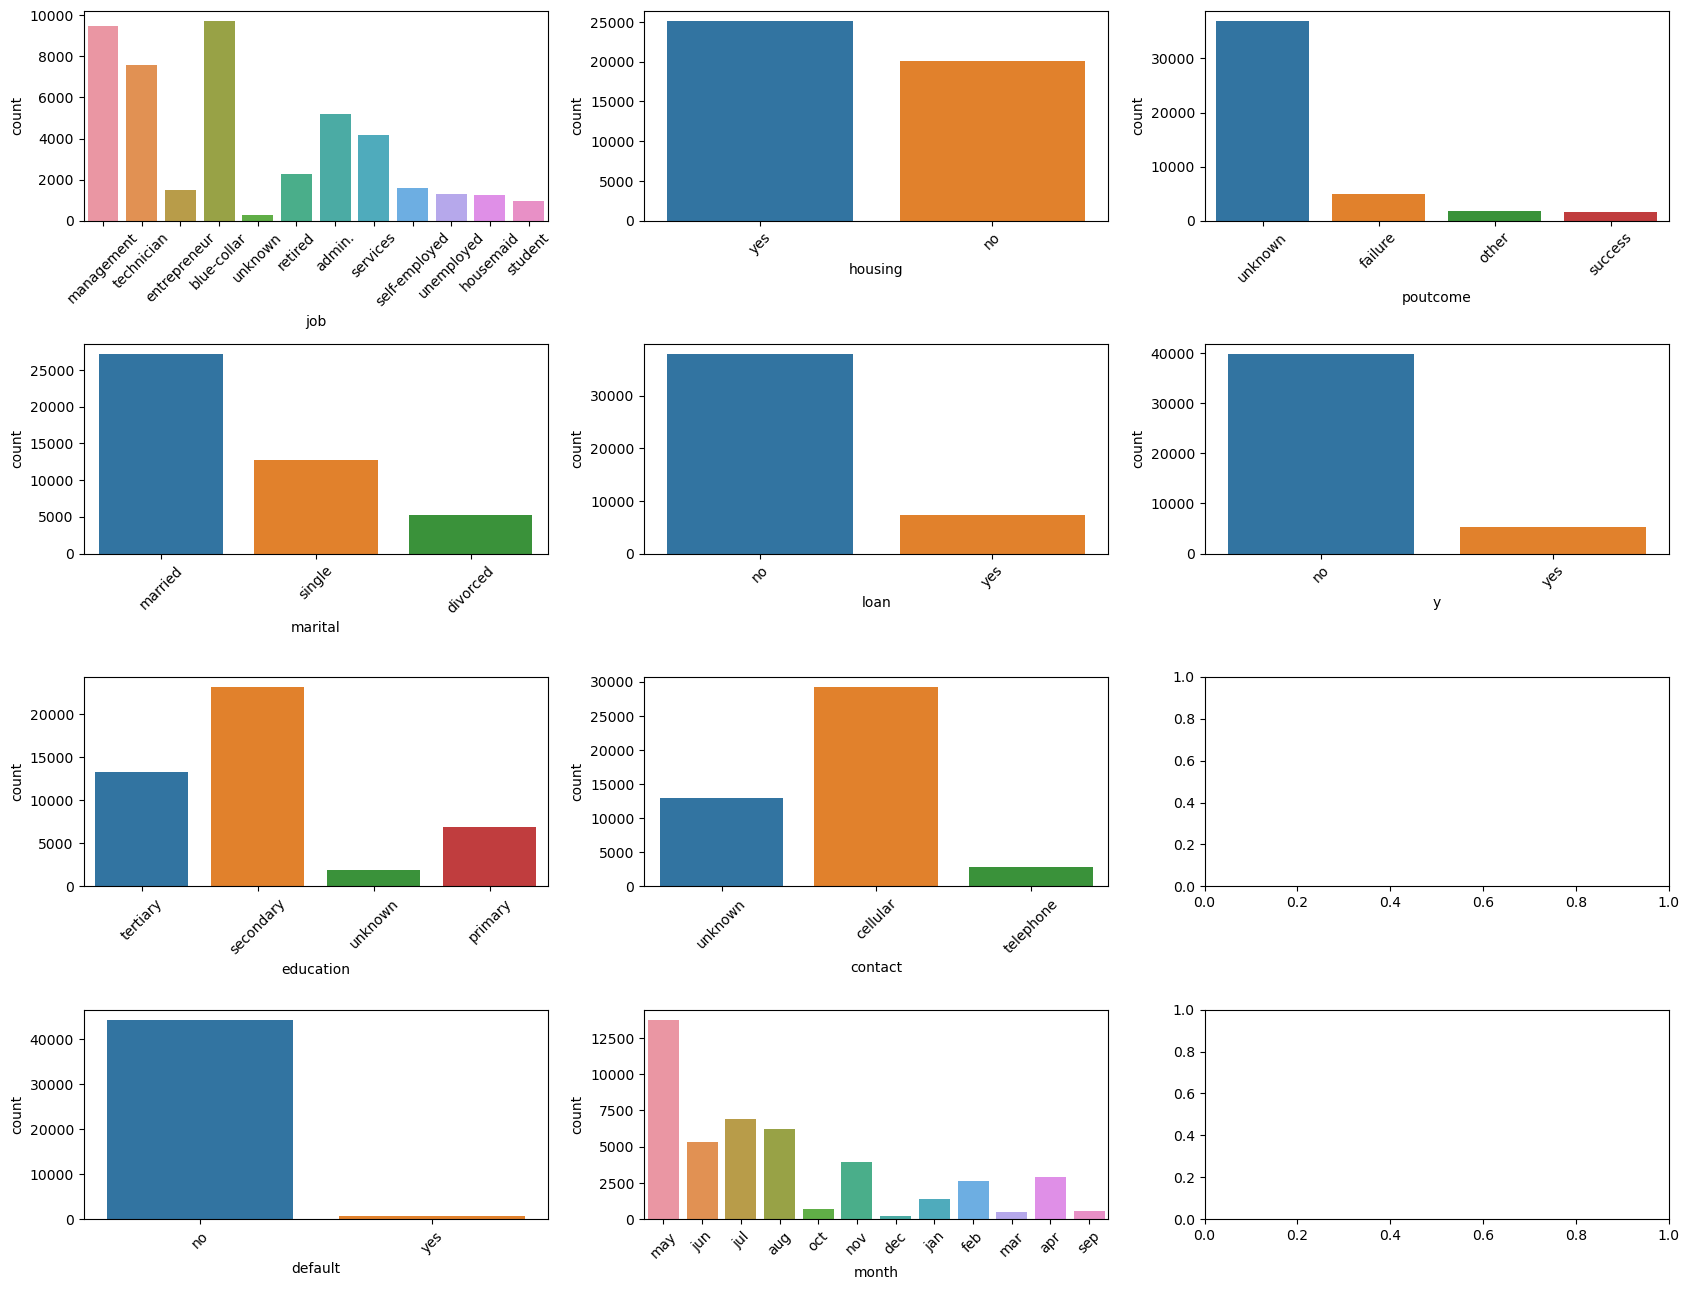

In [6]:
import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

f, axes = plt.subplots(4,3,figsize=(17,13), sharex=False)
for i, feature in enumerate(df_cat_var_list):
    sns.countplot(data=df, x=feature, ax=axes[i%4, i//4])
    axes[i%4, i//4].tick_params(axis='x', labelrotation = 45)
    
plt.tight_layout()
plt.show()

Use heatmap to display the numerical features' correlation

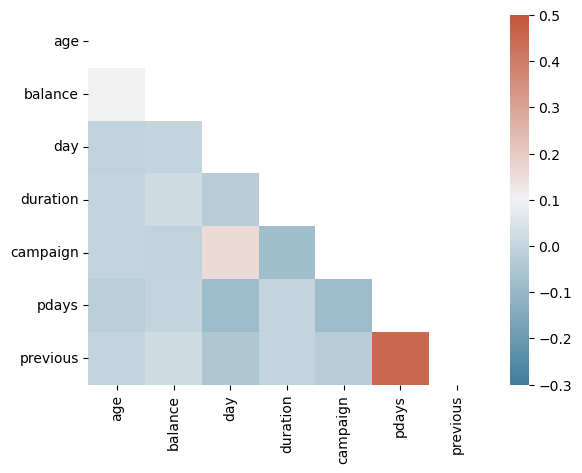

In [7]:
# code here
import seaborn as sns
import numpy as np 

corr=df.corr(numeric_only=True).round(decimals=2)
labels=np.array(corr).astype(str)
sns.heatmap(data=corr, vmin=-0.3, vmax=0.5, 
            annot=labels, fmt='',
            cmap=sns.diverging_palette(230, 20, as_cmap=True), 
            mask = np.triu(np.ones_like(corr, dtype=bool))
            )

plt.show()

In [8]:
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


In [9]:
# df.select_dtypes(include=["float", 'int'])

The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the propoer hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe is good, maybe is wrong. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python datetime librairies for doing this preprocessing.
(the default year used will be 1984)

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
# df.month

In [12]:
#code here
dayoftheyear=(
        pd.to_datetime(
            arg=df[['day', 'month']]
                  .assign(year='1984', 
                        date=lambda df : [str(df['day'][row])+df['month'][row]+df['year'][row] for row in df.index.values])
                  .loc[:, 'date']
    , format="%d%b%Y"
    )
 ).dt.dayofyear

df = df.assign(dayoftheyear=dayoftheyear).drop(columns=['month', 'day'])

In [13]:
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,126
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,126
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,126
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,126
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes,322
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes,322
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes,322
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no,322


We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. Now sort the features into categorical and numerical features

In [14]:
categorical_features = df.drop(columns='y').select_dtypes(include='object').columns.to_list() # to be completed
numerical_features = df.select_dtypes(include='number').columns.to_list() # to be completed

After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

In [15]:
#est-ce qu'il y a des NA dans y ? NON
df.y.unique()

array(['no', 'yes'], dtype=object)

In [16]:
# import and create the appropriate encoders 

#il faut replace tous les yes par 1 et tous les no par 0 et ENSUITE faire les dummies
df_encode = df.replace(to_replace=['yes','no'], value=[1,0])

df_encode = (pd
    .get_dummies(
        data=df_encode, 
        columns=['job', 'marital', "education", 'contact', 'poutcome'], 
        dtype=float
        )
    # .assign(
    #     y = lambda df : [1 if df['y'][row]=='yes' else 0 for row in df.index.values ]
    # )
)
df_encode

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,0,29,1,0,151,1,-1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,0,2,1,1,76,1,-1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47,0,1506,1,0,92,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33,0,1,0,0,198,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,71,0,1729,0,0,456,2,-1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,0,5715,0,0,1127,5,184,3,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,57,0,668,0,0,508,4,-1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
df_encode.corr().round(decimals=2)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.00,-0.02,0.10,-0.19,-0.02,-0.00,0.00,-0.02,0.00,0.03,...,-0.09,-0.08,0.07,-0.07,0.17,-0.02,-0.00,-0.02,0.04,-0.00
default,-0.02,1.00,-0.07,-0.01,0.08,-0.01,0.02,-0.03,-0.02,-0.02,...,0.01,-0.02,-0.00,-0.01,-0.02,0.02,-0.03,-0.01,-0.02,0.04
balance,0.10,-0.07,1.00,-0.07,-0.08,0.02,-0.01,0.00,0.02,0.05,...,-0.07,0.08,0.01,0.02,0.04,-0.04,0.01,0.01,0.04,-0.03
housing,-0.19,-0.01,-0.07,1.00,0.04,0.01,-0.02,0.12,0.04,-0.14,...,0.10,-0.10,-0.05,-0.16,-0.08,0.21,0.11,0.04,-0.09,-0.06
loan,-0.02,0.08,-0.08,0.04,1.00,-0.01,0.01,-0.02,-0.01,-0.07,...,0.07,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,-0.01,-0.05,0.03
duration,-0.00,-0.01,0.02,0.01,-0.01,1.00,-0.08,-0.00,0.00,0.39,...,0.00,0.00,-0.00,0.03,-0.02,-0.01,-0.02,-0.00,0.04,-0.00
campaign,0.00,0.02,-0.01,-0.02,0.01,-0.08,1.00,-0.09,-0.03,-0.07,...,-0.02,0.01,0.01,-0.03,0.05,0.00,-0.09,-0.02,-0.06,0.11
pdays,-0.02,-0.03,0.00,0.12,-0.02,-0.00,-0.09,1.00,0.45,0.10,...,0.02,-0.01,-0.01,0.23,0.02,-0.25,0.70,0.39,0.23,-0.87
previous,0.00,-0.02,0.02,0.04,-0.01,0.00,-0.03,0.45,1.00,0.09,...,-0.01,0.02,-0.01,0.13,0.03,-0.15,0.35,0.31,0.20,-0.53
y,0.03,-0.02,0.05,-0.14,-0.07,0.39,-0.07,0.10,0.09,1.00,...,-0.04,0.07,0.01,0.14,0.01,-0.15,0.01,0.03,0.31,-0.17


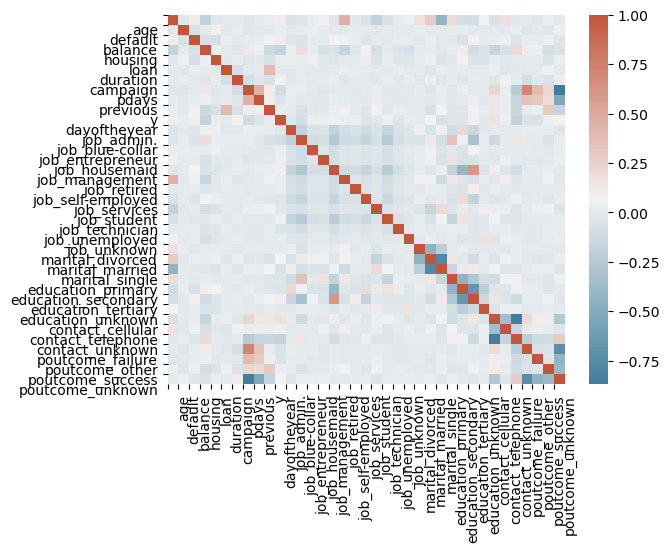

In [18]:
corr=df_encode.corr()

fig, axes = plt.subplots()


sns.heatmap(data=corr, #vmin=-0.3, vmax=0.5, 
            annot=False, #fmt='',
            cmap=sns.diverging_palette(230, 20, as_cmap=True)
            #mask = np.triu(np.ones_like(corr, dtype=bool))
            )

# plt.yticks(fontsize=5)
# plt.xticks(fontsize=5)

rcParams['figure.figsize'] = 20, 14
# plt.matshow(df_encode.corr())
plt.yticks(np.arange(df_encode.shape[1]), df_encode.columns)
plt.xticks(np.arange(df_encode.shape[1]), df_encode.columns)
# plt.colorbar()

# for label in axes.get_xticklabels():
#     label.set_horizontalalignment('center')
# plt.setp(axes.get_xticklabels(), rotation=90, ha="right", 
#          rotation_mode="anchor")

# axes.set_xticks(ticks)
axes.set_xticklabels(df_encode.columns, rotation=90)

# create -5pt offset in x direction
from matplotlib.transforms import ScaledTranslation
dx, dy = 16, 0
offset = ScaledTranslation(dx / fig.dpi, dy / fig.dpi, fig.dpi_scale_trans)
# apply offset to all xticklabels
for label in axes.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

dx, dy = 0, -16
offset = ScaledTranslation(dx / fig.dpi, dy / fig.dpi, fig.dpi_scale_trans)
# apply offset to all xticklabels
for label in axes.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.show()

Now, the dataset needs to be split into two sets :
1. one corresponding to $ŷ$ 
2. the other corresponding to the $X$ matrix.

- Prepare the learning dataset

In [19]:
# Create the X and y DataFrames resample the dataframes if necessary
y = df_encode.loc[:, 'y']
X = df_encode.drop(columns=['y', 'duration'])

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Split with a 30% test set, we stratify so that we have the same rate of positives
#in the training and test sets (as well as the same sex ratio, it will be useful at the end of the notebook)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.3, 
                                                    stratify = pd.concat([df_encode[['loan', "default"]], y], axis = 1)
                                                    )

#Scaling continuous variables
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

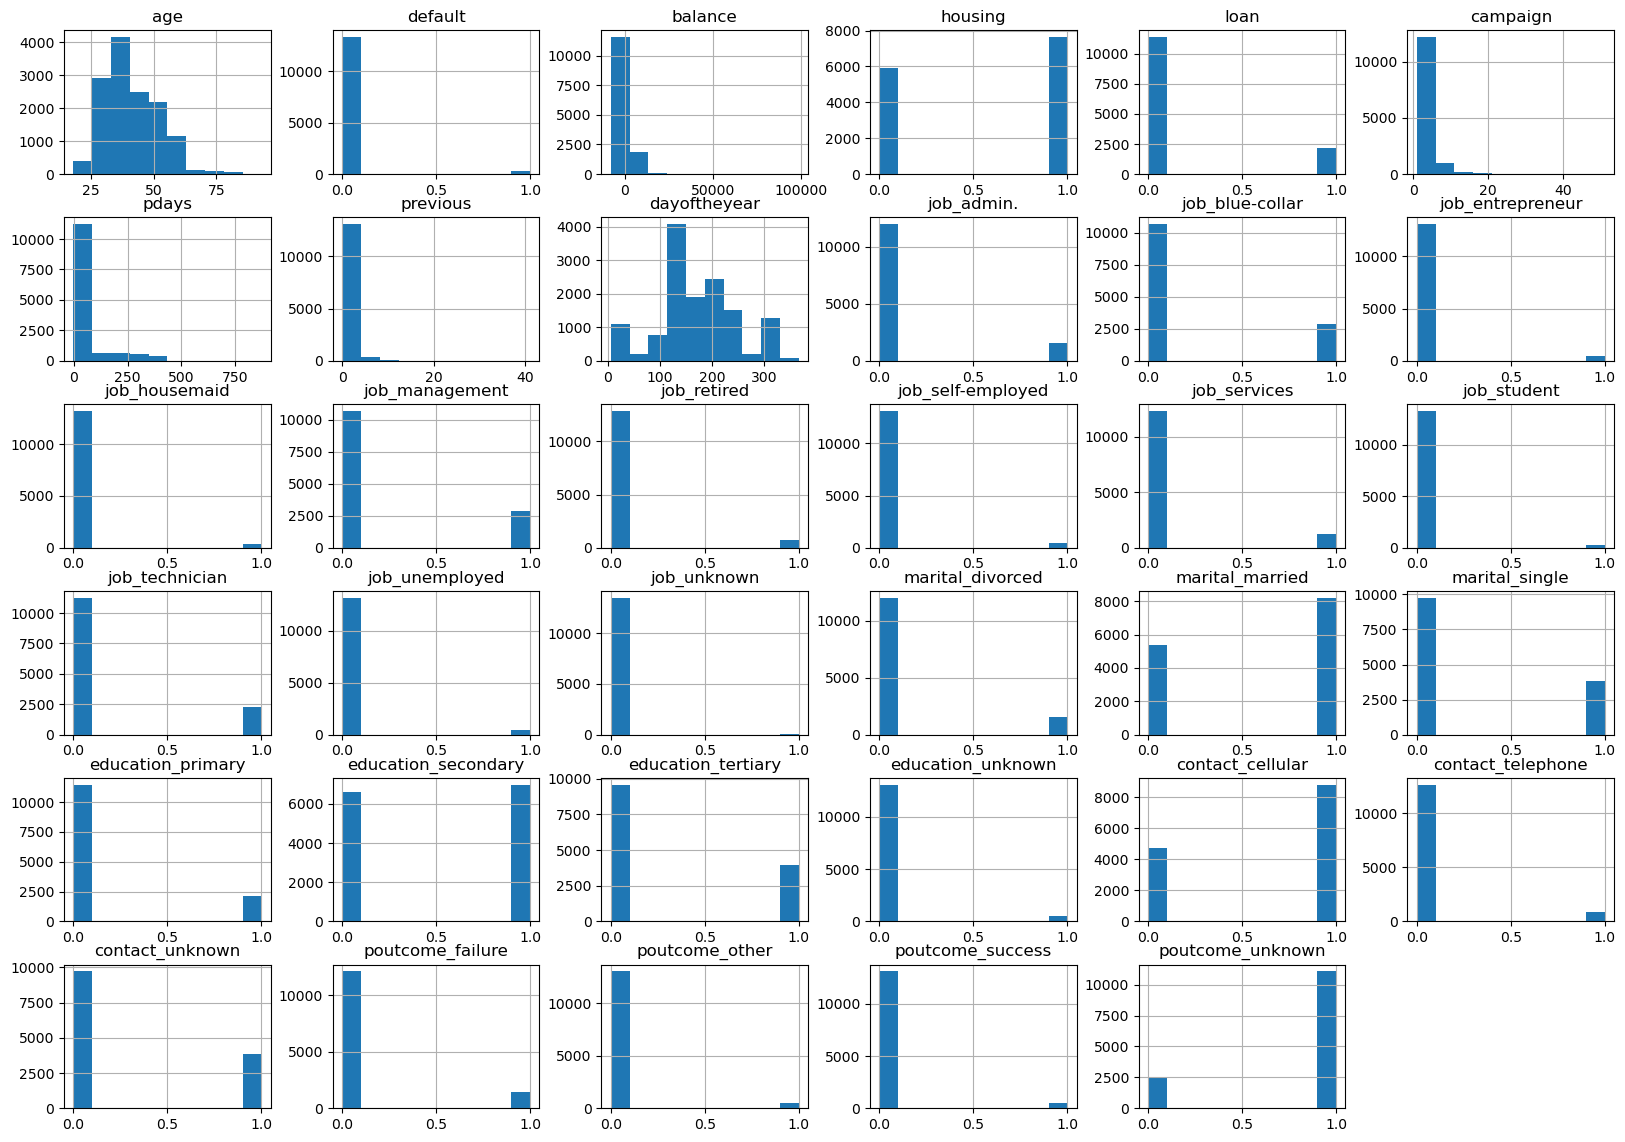

In [20]:
X_test.hist()
plt.show()

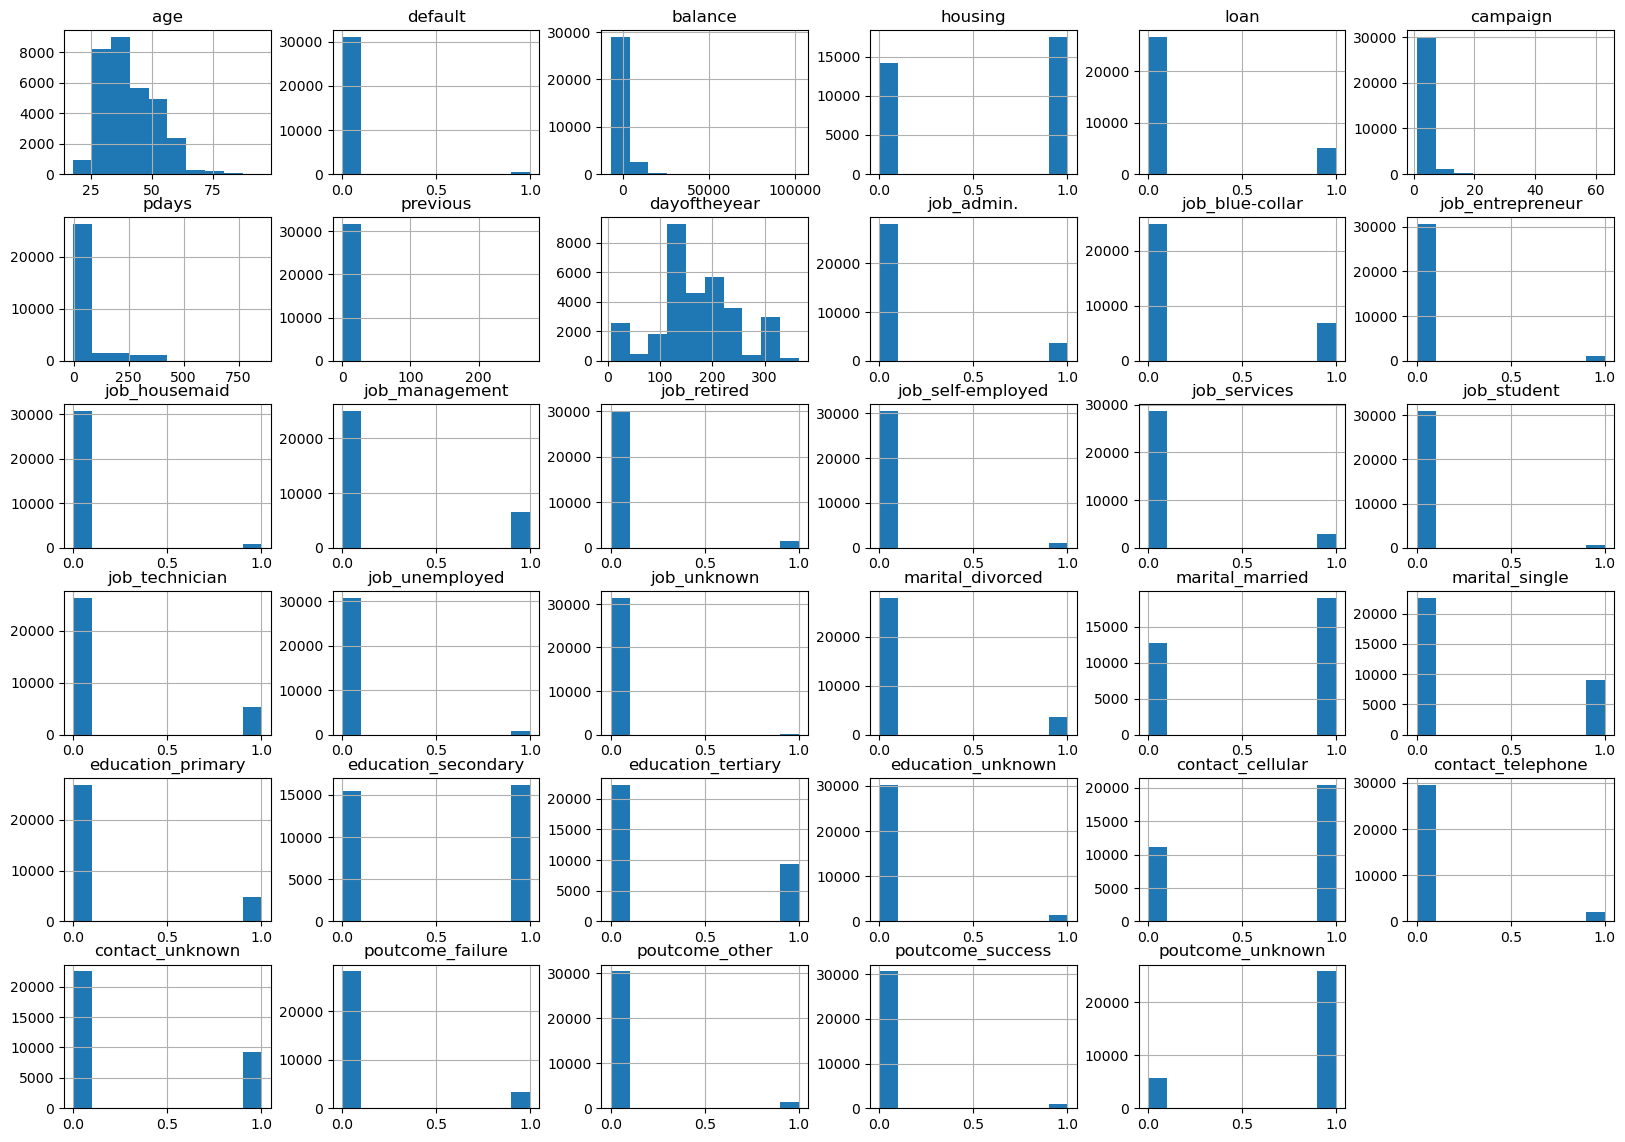

In [21]:
X_train.hist()
plt.show()

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Display the shape of X and y

In [22]:
# code here
X_train.describe()

,age,default,balance,housing,loan,campaign,pdays,previous,dayoftheyear,job_admin.,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,...,31647.000000,31647.000000,31647.00000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.974342,0.018011,1368.365437,0.552912,0.160205,2.753879,40.044554,0.581793,172.157582,0.114292,...,0.512529,0.294593,0.04269,0.646507,0.063892,0.289601,0.108352,0.040889,0.032926,0.817834
std,10.630365,0.132994,3093.677858,0.497200,0.366802,3.093101,99.986186,2.455160,74.739606,0.318171,...,0.499851,0.455867,0.20216,0.478062,0.244565,0.453584,0.310829,0.198035,0.178445,0.385987
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,130.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,446.000000,1.000000,0.000000,2.000000,-1.000000,0.000000,157.000000,0.000000,...,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,0.000000,1410.500000,1.000000,0.000000,3.000000,-1.000000,0.000000,218.000000,0.000000,...,1.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,63.000000,854.000000,275.000000,365.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
y_train.describe()

count    31647.000000
mean         0.116978
std          0.321399
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

Well done! The data is now ready to be splitted into sets and used to train models!

Hop hop hop!!! Not to fast!! You processed the data for machine learning, but are all the data useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 

In [24]:
# remove duration column
# X_train=X_train.drop(columns='duration')
# X_test=X_test.drop(columns='duration')

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it wants a pipeline easy to use and evaluate.
2. A model, that performs well.

Before beginning the modelling phase let's split the dataset into one training set and one testing set.

In [25]:
# train_test split
# X_train, X_test, y_train, y_test = None
X_train

,age,default,balance,housing,loan,campaign,pdays,previous,dayoftheyear,job_admin.,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
15523,34,0,45,1,1,3,-1,0,200,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
38438,27,0,-15,1,1,4,312,6,136,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
26677,37,0,315,0,0,1,-1,0,325,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32981,24,0,204,1,1,3,-1,0,108,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
22768,47,0,756,0,0,4,-1,0,238,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,47,0,287,0,0,1,-1,0,172,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
28040,43,0,1796,0,0,2,-1,0,28,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13332,27,0,-151,0,0,2,-1,0,190,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
40590,42,0,11008,0,0,6,405,1,210,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Create the X and y DataFrames resample the dataframes if necessary
y = df_encode.loc[:, 'y']
X = df_encode.drop(columns=['y', 'duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.3, 
                                                    stratify = pd.concat([df_encode[['loan', "default"]], y], axis = 1)
                                                    )

#Scaling continuous variables
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train_scaled, y_train)
scores = cross_val_score(tree_clf, X_train_scaled, y_train, cv=5, scoring='f1')
print('Longueur du dataset de train : ', len(X_train_scaled))
print('F1 moyen : ', round(scores.mean(),3), " +/- ", round(scores.std(),3))

Longueur du dataset de train :  31647
F1 moyen :  0.238  +/-  0.02


Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [27]:
from math import sqrt

# create a new train and test dataset with a different seed
# Create the X and y DataFrames resample the dataframes if necessary
y = df_encode.loc[:, 'y']
X = df_encode.drop(columns=['y', 'duration'])


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.25, 
                                                    stratify = pd.concat([df_encode[['loan', "default"]], y], axis = 1)
                                                    )

#Scaling continuous variables
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train_scaled, y_train)
scores = cross_val_score(tree_clf, X_train_scaled, y_train, cv=5, scoring='f1')
print('Longueur du dataset de train : ', len(X_train_scaled))
print('f1 moyen pour train_size=0.75: ', round(scores.mean(),3), " +/- ", round(scores.std(),3))

#le plot est nul, on verrait mieux sur matrice de confusion
# plt.figure(figsize=(10, 4))
# plt.scatter(x=y_test, y=tree_clf.predict(X_test_scaled)) 
# plt.show()

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tree_clf.predict(X_test_scaled))

Longueur du dataset de train :  33908
f1 moyen pour train_size=0.75:  0.285  +/-  0.006


array([[9842,  139],
       [1075,  247]])

In [28]:
# create a new train and test dataset with a different seed
# Create the X and y DataFrames resample the dataframes if necessary
y = df_encode.loc[:, 'y']
X = df_encode.drop(columns=['y', 'duration'])

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Split with a 30% test set, we stratify so that we have the same rate of positives
#in the training and test sets (as well as the same sex ratio, it will be useful at the end of the notebook)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1000, 
                                                    test_size = 0.75, 
                                                    stratify = pd.concat([df_encode[['loan', "default"]], y], axis = 1)
                                                    )

#Scaling continuous variables
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train_scaled, y_train)
scores = cross_val_score(tree_clf, X_train_scaled, y_train, cv=5, scoring="f1")
print('Longueur du dataset de train : ', len(X_train_scaled))
print('f1 moyen pour train_size=0.75: ', round(scores.mean(),3), " +/- ", round(scores.std(),3))

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tree_clf.predict(X_test_scaled))

Longueur du dataset de train :  11302
f1 moyen pour train_size=0.75:  0.285  +/-  0.017


array([[29557,   385],
       [ 3251,   716]])

What can you tell about the two trees?

*answer here*  
<font color="#9900FF">
Avec + de data on a + de bruit donc modèle moins performant ? 
</font>

Normally, before creating a model, one or more evaluation metrics should be chosen depending of the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Cross validation on Decision trees
score_list = ["accuracy","precision", "recall", 'f1', 'average_precision']

# Create the X and y DataFrames resample the dataframes if necessary
y = df_encode.loc[:, 'y']
X = df_encode.drop(columns=['y', 'duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.3, 
                                                    stratify = pd.concat([df_encode[['loan', "default"]], y], axis = 1)
                                                    )
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train_scaled, y_train)
tree_clf_cv = cross_validate(tree_clf, X_train_scaled, y_train, cv=5, scoring=score_list, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END  accuracy: (test=0.891) average_precision: (test=0.276) f1: (test=0.229) precision: (test=0.675) recall: (test=0.138) total time=   0.1s
[CV] END  accuracy: (test=0.889) average_precision: (test=0.247) f1: (test=0.231) precision: (test=0.602) recall: (test=0.143) total time=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] END  accuracy: (test=0.893) average_precision: (test=0.278) f1: (test=0.273) precision: (test=0.672) recall: (test=0.172) total time=   0.1s
[CV] END  accuracy: (test=0.892) average_precision: (test=0.269) f1: (test=0.215) precision: (test=0.701) recall: (test=0.127) total time=   0.1s
[CV] END  accuracy: (test=0.892) average_precision: (test=0.271) f1: (test=0.240) precision: (test=0.679) recall: (test=0.146) total time=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


Now process the output of your cross-validation in order to know the diversity in performances and the average performance

In [30]:
tree_clf_cv

{'fit_time': array([0.06724334, 0.065027  , 0.06804156, 0.06862211, 0.06865907]),
 'score_time': array([0.03578663, 0.03617644, 0.03592539, 0.03582454, 0.03942156]),
 'test_accuracy': array([0.89131122, 0.88862559, 0.89334808, 0.89161005, 0.89208406]),
 'test_precision': array([0.67549669, 0.60227273, 0.67195767, 0.70149254, 0.67924528]),
 'test_recall': array([0.13765182, 0.14304993, 0.17162162, 0.12702703, 0.14594595]),
 'test_f1': array([0.22869955, 0.23118866, 0.27341227, 0.21510297, 0.24026696]),
 'test_average_precision': array([0.27607929, 0.24723184, 0.27834551, 0.26905923, 0.27133721])}

In [31]:
#F1 score : 
tree_clf_cv['test_f1'].mean()

#entre 0 et 1, plus il est élevé mieux c'est

0.23773408392388454

In [32]:
#Average precision : 
tree_clf_cv["test_average_precision"].mean()

0.2684106167110438

Plot your metrics performance

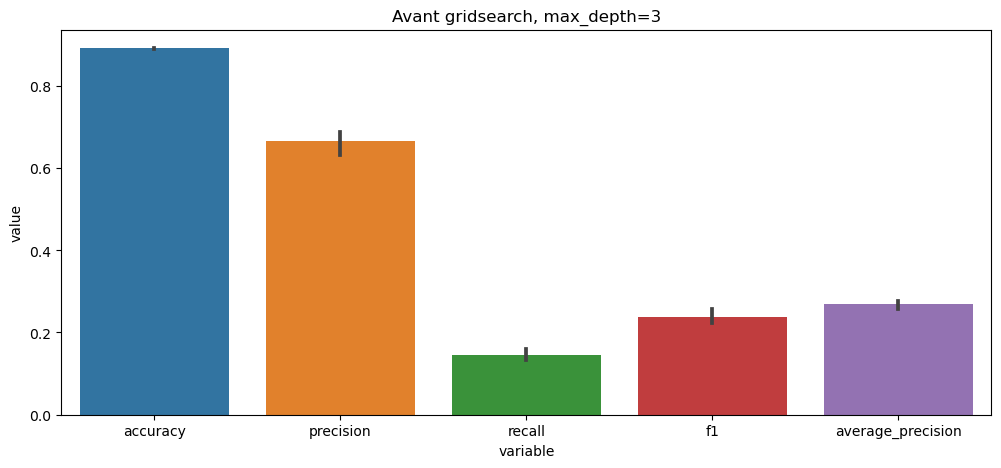

In [33]:
metrics_perf = pd.DataFrame(
{
    "accuracy" : tree_clf_cv["test_accuracy"],
    "precision" : tree_clf_cv["test_precision"], 
    "recall" : tree_clf_cv["test_recall"], 
    'f1' : tree_clf_cv["test_f1"], 
    'average_precision': tree_clf_cv["test_average_precision"]
}
    
).melt()
rcParams['figure.figsize'] = 12, 5

plotavantgs = sns.barplot(data=metrics_perf, x='variable', y='value')
plt.title("Avant gridsearch, max_depth=3")
plt.show()

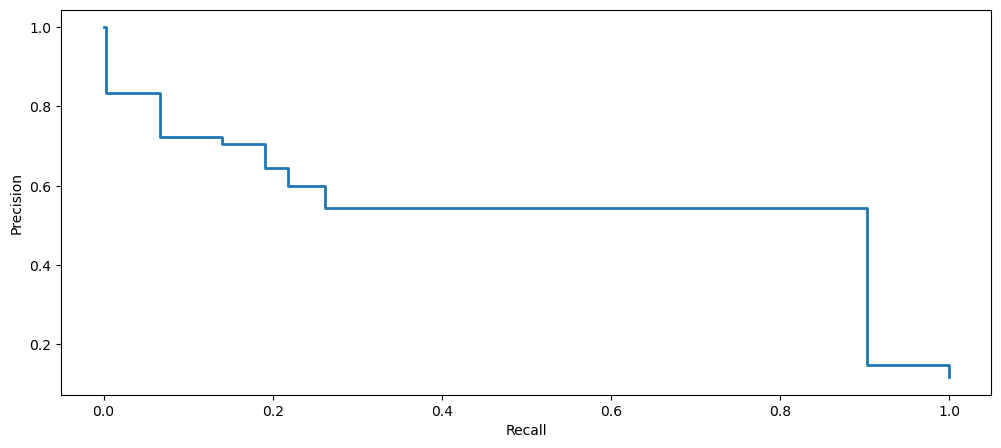

In [34]:
from sklearn.metrics import precision_recall_curve

rcParams['figure.figsize'] = 12, 5

# performance plot
def plot_precision_recall_curve(precisions, recalls):
    plt.step(recalls, precisions, linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
precisions, recalls, thresholds = precision_recall_curve(y_test, tree_clf.predict_proba(X_test_scaled)[:, 1])
plot_precision_recall_curve(precisions=precisions, recalls=recalls)

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [35]:
from sklearn.model_selection import GridSearchCV

# Grid search

param_grid={'max_depth': [1,3,10,25,40,50,100]}

tree_clf_gridsearch = GridSearchCV(DecisionTreeClassifier(),  param_grid=param_grid, cv=5, verbose=3, scoring='f1')
tree_clf_gridsearch.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......................max_depth=1;, score=0.281 total time=   0.0s
[CV 2/5] END .......................max_depth=1;, score=0.251 total time=   0.0s
[CV 3/5] END .......................max_depth=1;, score=0.304 total time=   0.0s
[CV 4/5] END .......................max_depth=1;, score=0.287 total time=   0.0s
[CV 5/5] END .......................max_depth=1;, score=0.299 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.229 total time=   0.1s
[CV 2/5] END .......................max_depth=3;, score=0.231 total time=   0.1s
[CV 3/5] END .......................max_depth=3;, score=0.273 total time=   0.1s
[CV 4/5] END .......................max_depth=3;, score=0.215 total time=   0.1s
[CV 5/5] END .......................max_depth=3;, score=0.240 total time=   0.1s
[CV 1/5] END ......................max_depth=10;, score=0.360 total time=   0.2s
[CV 2/5] END ......................max_depth=10;,

[CV 3/5] END ......................max_depth=10;, score=0.296 total time=   0.2s
[CV 4/5] END ......................max_depth=10;, score=0.384 total time=   0.2s
[CV 5/5] END ......................max_depth=10;, score=0.304 total time=   0.2s
[CV 1/5] END ......................max_depth=25;, score=0.318 total time=   0.3s
[CV 2/5] END ......................max_depth=25;, score=0.313 total time=   0.3s
[CV 3/5] END ......................max_depth=25;, score=0.321 total time=   0.3s
[CV 4/5] END ......................max_depth=25;, score=0.343 total time=   0.3s
[CV 5/5] END ......................max_depth=25;, score=0.331 total time=   0.3s
[CV 1/5] END ......................max_depth=40;, score=0.317 total time=   0.3s
[CV 2/5] END ......................max_depth=40;, score=0.305 total time=   0.3s
[CV 3/5] END ......................max_depth=40;, score=0.313 total time=   0.3s
[CV 4/5] END ......................max_depth=40;, score=0.336 total time=   0.3s
[CV 5/5] END ...............

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 10, 25, 40, 50, 100]},
             scoring='f1', verbose=3)

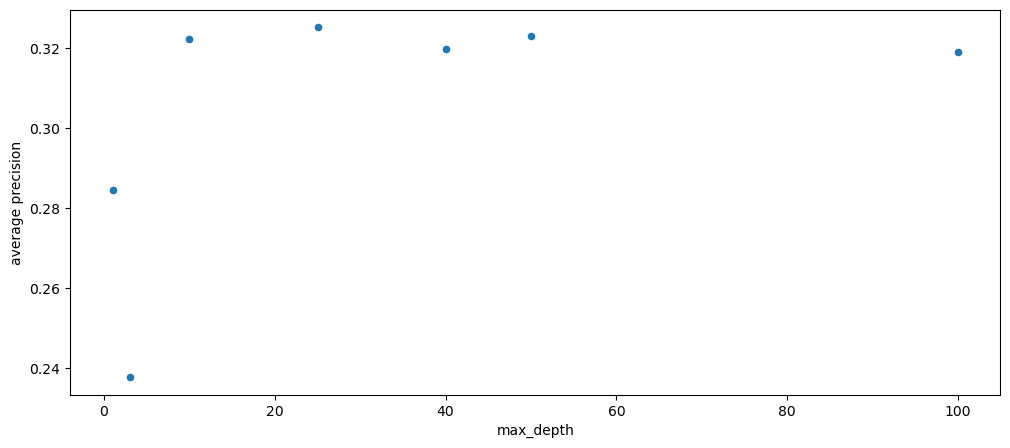

In [36]:
tree_clf_gridsearch.cv_results_["mean_test_score"]
tree_clf_gridsearch.cv_results_["params"]
tree_clf_gridsearch_results = pd.DataFrame(
    {'average precision' : tree_clf_gridsearch.cv_results_['mean_test_score'],
    'max_depth':[element[1]['max_depth'] for element in enumerate(tree_clf_gridsearch.cv_results_["params"])]
    }
)

rcParams['figure.figsize'] = 12, 5
tree_clf_gridsearch_results.plot(kind="scatter",x="max_depth", y='average precision')
plt.show()

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [37]:
# Test metrics

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Cross validation on Decision trees
score_list = ["accuracy","precision", "recall", 'f1', 'average_precision']

# Create the X and y DataFrames resample the dataframes if necessary
y = df_encode.loc[:, 'y']
X = df_encode.drop(columns=['y', 'duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.3, 
                                                    stratify = pd.concat([df_encode[['loan', "default"]], y], axis = 1)
                                                    )
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree_clf = DecisionTreeClassifier(max_depth=25)
tree_clf.fit(X_train_scaled, y_train)
tree_clf_cv = cross_validate(tree_clf, X_train_scaled, y_train, cv=5, scoring=score_list, verbose=3)


#F1 score : 
print("F1 score:", tree_clf_cv['test_f1'].mean())

#entre 0 et 1, plus il ets élevée mieux c'est

#Average precision : 
print("AP", tree_clf_cv["test_average_precision"].mean())
#AP de 0.20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  accuracy: (test=0.842) average_precision: (test=0.194) f1: (test=0.322) precision: (test=0.324) recall: (test=0.320) total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END  accuracy: (test=0.847) average_precision: (test=0.191) f1: (test=0.308) precision: (test=0.326) recall: (test=0.291) total time=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] END  accuracy: (test=0.844) average_precision: (test=0.196) f1: (test=0.329) precision: (test=0.331) recall: (test=0.327) total time=   0.4s
[CV] END  accuracy: (test=0.845) average_precision: (test=0.209) f1: (test=0.348) precision: (test=0.342) recall: (test=0.354) total time=   0.3s
[CV] END  accuracy: (test=0.849) average_precision: (test=0.203) f1: (test=0.333) precision: (test=0.344) recall: (test=0.323) total time=   0.4s
F1 score: 0.32795417043265107
AP 0.19897258266114976


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


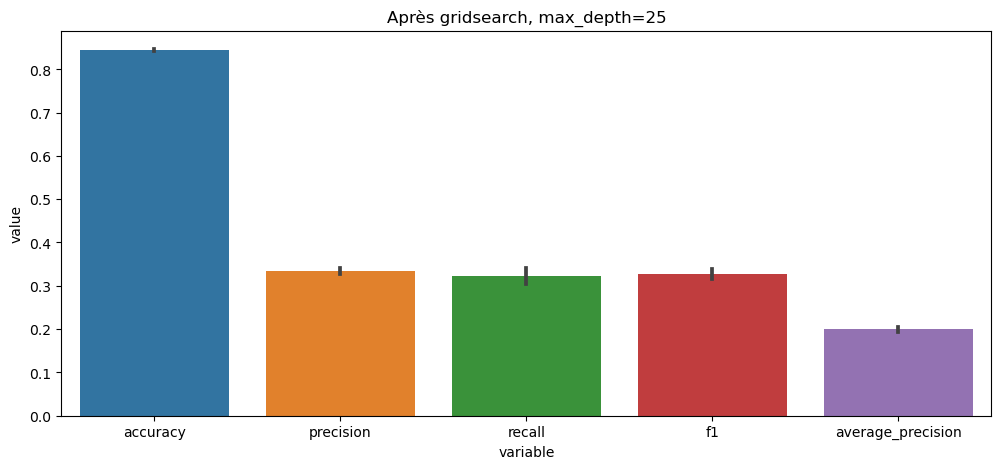

In [38]:
metrics_perf = pd.DataFrame(
{
    "accuracy" : tree_clf_cv["test_accuracy"],
    "precision" : tree_clf_cv["test_precision"], 
    "recall" : tree_clf_cv["test_recall"], 
    'f1' : tree_clf_cv["test_f1"], 
    'average_precision': tree_clf_cv["test_average_precision"]
}
    
).melt()
rcParams['figure.figsize'] = 12, 5

plotapresgs = sns.barplot(data=metrics_perf, x='variable', y='value')
plt.title("Après gridsearch, max_depth=25")
plt.show()

In [39]:
# from sklearn.metrics import precision_recall_curve


# # performance plot
# def plot_precision_recall_curve(precisions, recalls):
#     plt.step(recalls, precisions, linewidth=2)
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
    
# precisions, recalls, thresholds = precision_recall_curve(y_test, tree_clf.predict_proba(X_test_scaled)[:, 1])
# plot_precision_recall_curve(precisions=precisions, recalls=recalls)

What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# train_test split (you can copy paste the previously declared cell)
# X_train, X_test, y_train, y_test = None
# Create the X and y DataFrames resample the dataframes if necessary
y = df_encode.loc[:, 'y']
X = df_encode.drop(columns=['y', 'duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.3, 
                                                    stratify = pd.concat([df_encode[['loan', "default"]], y], axis = 1)
                                                    )
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [41]:
# gridsearch for the Random Forest classifier
#
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Grid search

param_grid={'n_estimators': [75,100,150,175],
            'max_depth' : [10,25,50]}
forest_clf = RandomForestClassifier()


tree_clf_gridsearch = GridSearchCV(forest_clf,  param_grid=param_grid, cv=5, verbose=3, scoring='f1')

tree_clf_gridsearch.fit(X_train_scaled, y_train)




Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....max_depth=10, n_estimators=75;, score=0.259 total time=   2.0s
[CV 2/5] END .....max_depth=10, n_estimators=75;, score=0.251 total time=   1.8s
[CV 3/5] END .....max_depth=10, n_estimators=75;, score=0.274 total time=   2.1s
[CV 4/5] END .....max_depth=10, n_estimators=75;, score=0.254 total time=   2.1s
[CV 5/5] END .....max_depth=10, n_estimators=75;, score=0.271 total time=   2.0s
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.262 total time=   2.7s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.247 total time=   2.4s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.276 total time=   2.7s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.269 total time=   2.7s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.273 total time=   2.7s
[CV 1/5] END ....max_depth=10, n_estimators=150;, score=0.265 total time=   4.0s
[CV 2/5] END ....max_depth=10, n_estimators=150;

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 25, 50],
                         'n_estimators': [75, 100, 150, 175]},
             scoring='f1', verbose=3)

In [42]:
tree_clf_gridsearch.cv_results_["mean_test_score"]
tree_clf_gridsearch.cv_results_["params"]
tree_clf_gridsearch_results = pd.DataFrame(
    {'f1' : tree_clf_gridsearch.cv_results_['mean_test_score'],
     'n_estimators':[element[1]['n_estimators'] for element in enumerate(tree_clf_gridsearch.cv_results_["params"])],
    'max_depth':[element[1]['max_depth'] for element in enumerate(tree_clf_gridsearch.cv_results_["params"])],
    'time' : tree_clf_gridsearch.cv_results_['mean_fit_time']
    }
)
tree_clf_gridsearch_results


,f1,n_estimators,max_depth,time
0,0.261840,75,10,1.882540
1,0.265379,100,10,2.494187
2,0.265227,150,10,3.738971
3,0.264630,175,10,4.368309
4,0.301831,75,25,3.025658
5,0.303437,100,25,4.019692
6,0.303926,150,25,6.078775
7,0.303540,175,25,7.064430
8,0.305685,75,50,3.084809
9,0.300767,100,50,4.137100


How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

*answer here*  
Premier essai :   
n_estimators=100  
max_depth = 50

4.2s and F1=0.304

Deuxième essai :  
n_estimators=75  
max_depth = 50

3.12s and F1=0.311

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [43]:
# Test metrics
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Cross validation on Decision trees
score_list = ["accuracy","precision", "recall", 'f1', 'average_precision']

# Create the X and y DataFrames resample the dataframes if necessary
y = df_encode.loc[:, 'y']
X = df_encode.drop(columns=['y', 'duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.3, 
                                                    stratify = pd.concat([df_encode[['loan', "default"]], y], axis = 1)
                                                    )
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

forest_clf = RandomForestClassifier(n_estimators=75, max_depth=50)

forest_clf.fit(X_train_scaled, y_train)
forest_clf_cv = cross_validate(forest_clf, X_train_scaled, y_train, cv=5, scoring=score_list, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  accuracy: (test=0.891) average_precision: (test=0.414) f1: (test=0.291) precision: (test=0.616) recall: (test=0.190) total time=   3.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] END  accuracy: (test=0.892) average_precision: (test=0.389) f1: (test=0.284) precision: (test=0.627) recall: (test=0.184) total time=   3.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s


[CV] END  accuracy: (test=0.892) average_precision: (test=0.395) f1: (test=0.315) precision: (test=0.603) recall: (test=0.214) total time=   3.6s
[CV] END  accuracy: (test=0.890) average_precision: (test=0.388) f1: (test=0.301) precision: (test=0.584) recall: (test=0.203) total time=   3.6s
[CV] END  accuracy: (test=0.893) average_precision: (test=0.387) f1: (test=0.328) precision: (test=0.613) recall: (test=0.224) total time=   3.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.8s finished


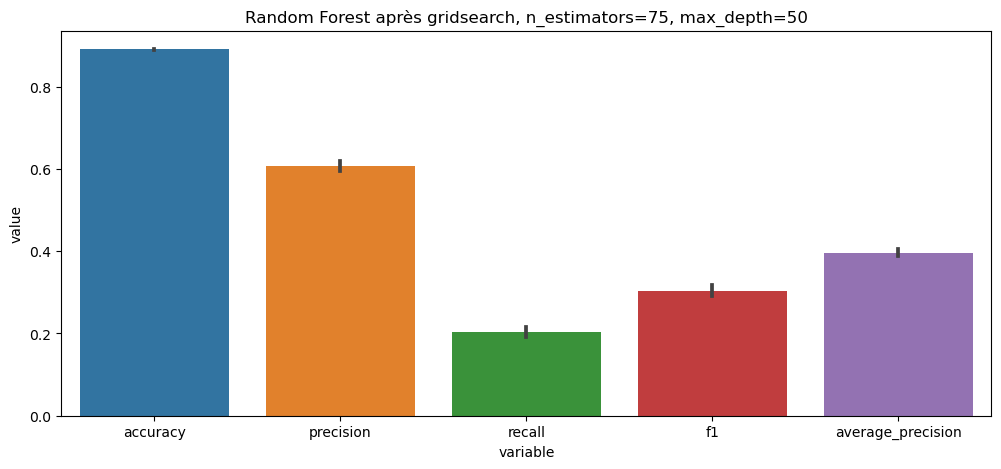

In [44]:
metrics_perf = pd.DataFrame(
{
    "accuracy" : forest_clf_cv["test_accuracy"],
    "precision" : forest_clf_cv["test_precision"], 
    "recall" : forest_clf_cv["test_recall"], 
    'f1' : forest_clf_cv["test_f1"], 
    'average_precision': forest_clf_cv["test_average_precision"]
}
    
).melt()
rcParams['figure.figsize'] = 12, 5

plotapresgs = sns.barplot(data=metrics_perf, x='variable', y='value')
plt.title("Random Forest après gridsearch, n_estimators=75, max_depth=50")
plt.show()

#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

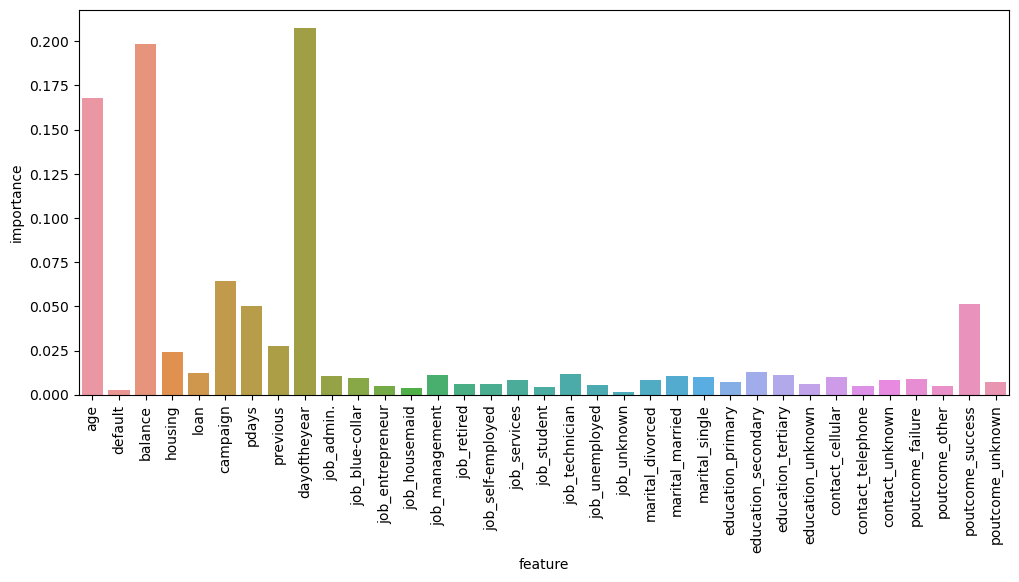

In [45]:
# training and display features' importance.
# tell them to use the RandomForest Object
importances = forest_clf.feature_importances_
importances
pd.Series(importances, index=[f"feature {i}" for i in range(X_train_scaled.shape[1])])

feature_importance  = pd.DataFrame(
    {
        "feature" : X_train.columns.values,
        "importance" : importances
    }
)

sns.barplot(data=feature_importance, x="feature", y="importance")
plt.subplot().set_xticklabels(feature_importance['feature'], rotation=90)
plt.show()

What is the most important feature?

*Answer here*  

1) dayoftheyear
2) balance
3) age

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [46]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features
from sklearn.feature_selection import RFECV



min_features_to_select = 1  # Minimum number of features to consider

rfecv = RFECV(
    estimator=forest_clf,
    step=1,
    cv=5,
    scoring="f1",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)
rfecv.fit(X_train_scaled, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")


Optimal number of features: 9


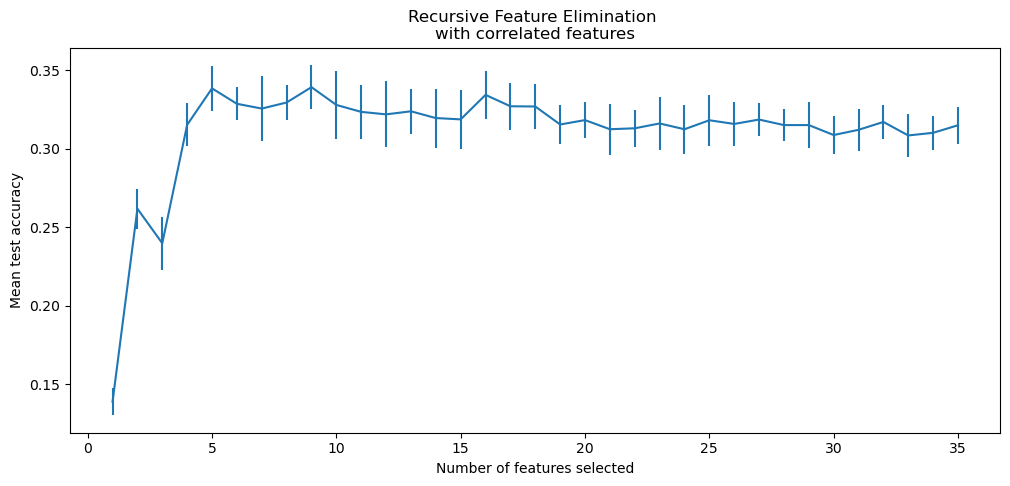

In [47]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [67]:
pd.DataFrame(
    {
        "feature" : X_train.columns.values,
        "selection_of_feature" : rfecv.support_,
        "ranking":rfecv.ranking_

        
    }
).sort_values(by="ranking")


,feature,selection_of_feature,ranking
0,age,True,1
2,balance,True,1
3,housing,True,1
5,campaign,True,1
7,previous,True,1
6,pdays,True,1
8,dayoftheyear,True,1
25,education_secondary,True,1
33,poutcome_success,True,1
18,job_technician,False,2


In [65]:
# rfecv.get_feature_names_out()



array([ 1, 26,  1,  1,  9,  1,  1,  1,  1,  6,  8, 23, 25,  5, 19, 17, 13,
       24,  2, 21, 27, 15,  3, 10, 14,  1,  7, 16,  4, 22, 11, 12, 20,  1,
       18])

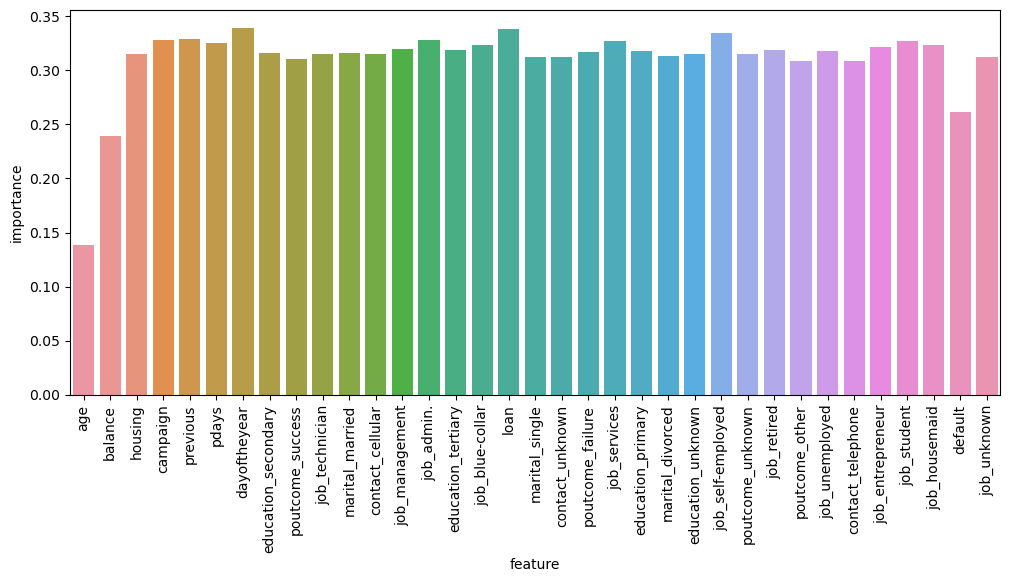

In [69]:


feature_importance  = pd.DataFrame(
    {
        "feature" : X_train.columns.values,
        "selection_of_feature" : rfecv.support_,
        "ranking":rfecv.ranking_,
        "importance" : rfecv.cv_results_["mean_test_score"]

        
    }
).sort_values(by="ranking")

sns.barplot(data=feature_importance, x="feature", y="importance")
plt.subplot().set_xticklabels(feature_importance['feature'], rotation=90)
plt.show()


We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

*Answer here*

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [70]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 
X_test_scaled

array([[ 0.00241369, -0.13543094,  0.55844918, ..., -0.20647445,
        -0.18451754,  0.47195516],
       [ 1.22534498, -0.13543094, -0.39835593, ..., -0.20647445,
        -0.18451754, -2.11884535],
       [ 0.00241369, -0.13543094, -0.44231724, ..., -0.20647445,
        -0.18451754,  0.47195516],
       ...,
       [ 0.00241369, -0.13543094, -0.33629289, ..., -0.20647445,
        -0.18451754,  0.47195516],
       [ 1.50755989, -0.13543094,  1.96618101, ..., -0.20647445,
        -0.18451754,  0.47195516],
       [-1.31458923, -0.13543094, -0.47981366, ..., -0.20647445,
        -0.18451754, -2.11884535]])

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [71]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [80]:
# model building and evaluation
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=Warning)
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
  ('clf', xgb.XGBClassifier(objective='binary:logistic'))
])

param_grid = [
    {
        'clf__n_estimators':[50,100,150],
        'clf__max_depth' : [10,25,50]
    }
]

grid = GridSearchCV(
  pipe,
  param_grid=param_grid,
  cv=5,
  scoring='f1',
  verbose=3,
  n_jobs=-1
)

model = grid.fit(X_train_scaled, y_train)

predict = model.predict(X_test_scaled)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future versio

[CV 1/5] END clf__max_depth=10, clf__n_estimators=50;, score=0.367 total time=   6.2s


/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/

[CV 3/5] END clf__max_depth=10, clf__n_estimators=50;, score=0.380 total time=   6.4s
[CV 4/5] END clf__max_depth=10, clf__n_estimators=50;, score=0.375 total time=   6.5s


/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/

[CV 2/5] END clf__max_depth=10, clf__n_estimators=50;, score=0.340 total time=   7.0s


/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/alexandra.lamotte@Digital-Grenoble.local/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/

[CV 5/5] END clf__max_depth=10, clf__n_estimators=50;, score=0.380 total time=   7.7s


KeyboardInterrupt: 

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [83]:
model.best_params_

{'clf__max_depth': 25, 'clf__n_estimators': 150}

In [84]:
model.best_score_

0.3775071241641908

In [87]:
# Test metrics
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



# Cross validation on Decision trees
score_list = ["accuracy","precision", "recall", 'f1', 'average_precision']

# Create the X and y DataFrames resample the dataframes if necessary
y = df_encode.loc[:, 'y']
X = df_encode.drop(columns=['y', 'duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.3, 
                                                    stratify = pd.concat([df_encode[['loan', "default"]], y], axis = 1)
                                                    )
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=150, max_depth=25)
model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)

model_cv = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=score_list, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  accuracy: (test=0.892) average_precision: (test=0.415) f1: (test=0.387) precision: (test=0.576) recall: (test=0.291) total time=  10.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


[CV] END  accuracy: (test=0.891) average_precision: (test=0.386) f1: (test=0.370) precision: (test=0.570) recall: (test=0.274) total time=   9.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.9s remaining:    0.0s


[CV] END  accuracy: (test=0.891) average_precision: (test=0.424) f1: (test=0.383) precision: (test=0.568) recall: (test=0.289) total time=   9.9s
[CV] END  accuracy: (test=0.890) average_precision: (test=0.405) f1: (test=0.380) precision: (test=0.561) recall: (test=0.288) total time=  10.5s
[CV] END  accuracy: (test=0.885) average_precision: (test=0.397) f1: (test=0.367) precision: (test=0.519) recall: (test=0.284) total time=   9.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   50.1s finished


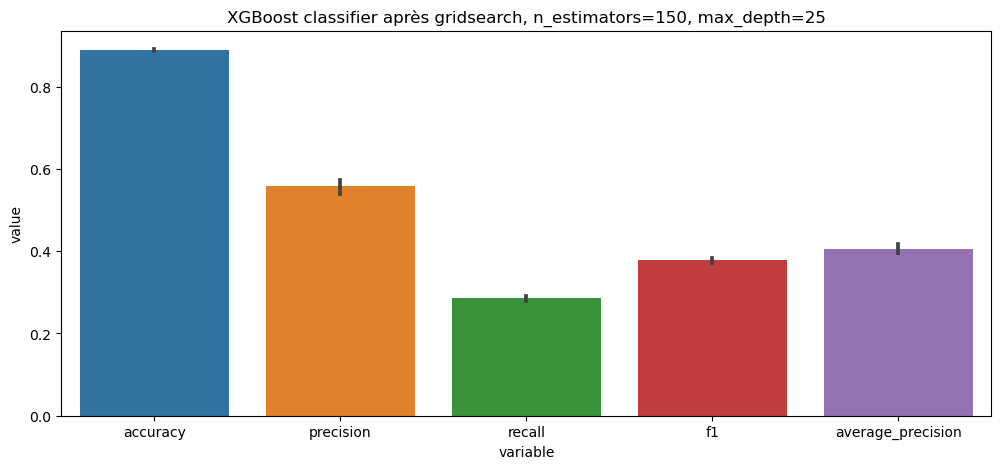

In [90]:
# performance curves
metrics_perf = pd.DataFrame(
{
    "accuracy" : model_cv["test_accuracy"],
    "precision" : model_cv["test_precision"], 
    "recall" : model_cv["test_recall"], 
    'f1' : model_cv["test_f1"], 
    'average_precision': model_cv["test_average_precision"]
}
    
).melt()
rcParams['figure.figsize'] = 12, 5

plotapresgs = sns.barplot(data=metrics_perf, x='variable', y='value')
plt.title("XGBoost classifier après gridsearch, n_estimators=150, max_depth=25")
plt.show()


## Let's Conclude

Report your test set metrics for the three methods here

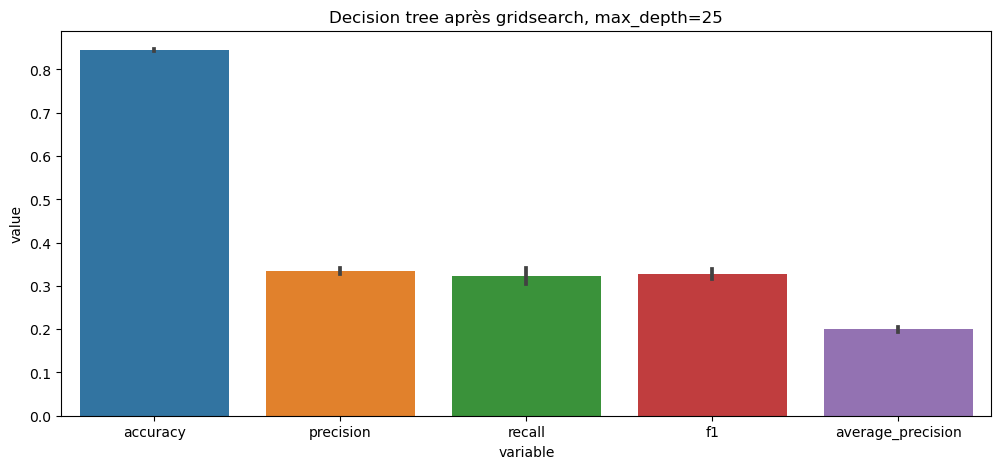

In [94]:
# Decision Tree on test set
metrics_perf = pd.DataFrame(
{
    "accuracy" : tree_clf_cv["test_accuracy"],
    "precision" : tree_clf_cv["test_precision"], 
    "recall" : tree_clf_cv["test_recall"], 
    'f1' : tree_clf_cv["test_f1"], 
    'average_precision': tree_clf_cv["test_average_precision"]
}
    
).melt()
rcParams['figure.figsize'] = 12, 5

plotapresgs = sns.barplot(data=metrics_perf, x='variable', y='value')
plt.title("Decision tree après gridsearch, max_depth=25")
plt.show()

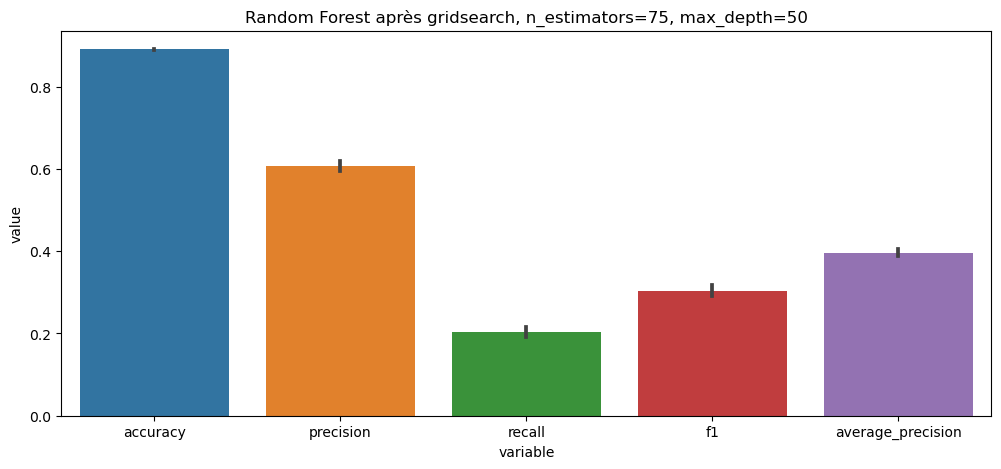

In [92]:
# Random forest on test set
metrics_perf = pd.DataFrame(
{
    "accuracy" : forest_clf_cv["test_accuracy"],
    "precision" : forest_clf_cv["test_precision"], 
    "recall" : forest_clf_cv["test_recall"], 
    'f1' : forest_clf_cv["test_f1"], 
    'average_precision': forest_clf_cv["test_average_precision"]
}
    
).melt()
rcParams['figure.figsize'] = 12, 5

plotapresgs = sns.barplot(data=metrics_perf, x='variable', y='value')
plt.title("Random Forest après gridsearch, n_estimators=75, max_depth=50")
plt.show()

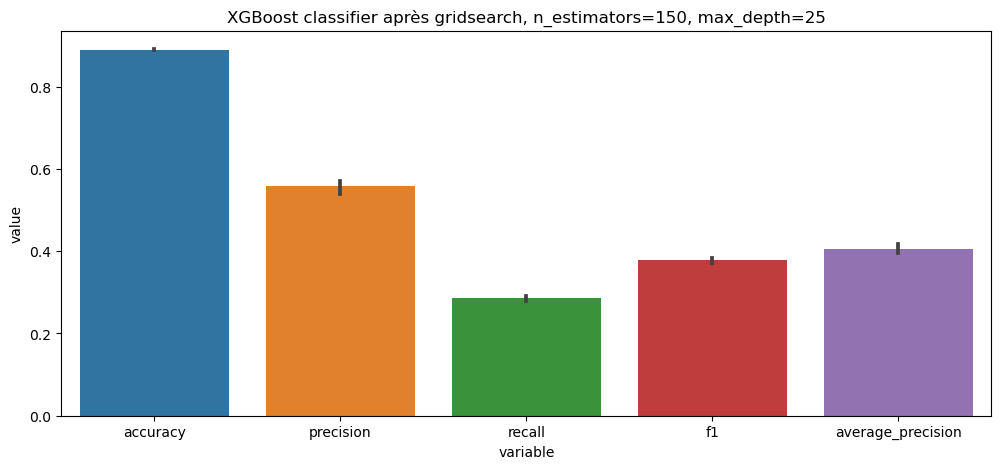

In [93]:
# XGBoost on test set
metrics_perf = pd.DataFrame(
{
    "accuracy" : model_cv["test_accuracy"],
    "precision" : model_cv["test_precision"], 
    "recall" : model_cv["test_recall"], 
    'f1' : model_cv["test_f1"], 
    'average_precision': model_cv["test_average_precision"]
}
    
).melt()
rcParams['figure.figsize'] = 12, 5

plotapresgs = sns.barplot(data=metrics_perf, x='variable', y='value')
plt.title("XGBoost classifier après gridsearch, n_estimators=150, max_depth=25")
plt.show()


What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train an new model.

In [ ]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [ ]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here